In [1]:
import os
import sys
sys.path.append(os.path.abspath('..'))

In [2]:
from importlib import reload
import scripts.data_load_clean_transform, scripts.insurance_analysis, scripts.hypothesis_test
reload(scripts.data_load_clean_transform)
reload(scripts.insurance_analysis)
reload(scripts.hypothesis_test)

<module 'scripts.hypothesis_test' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-3\\scripts\\hypothesis_test.py'>

In [3]:
from scripts.data_load_clean_transform import DataLoader, DataCleaner
from scripts.insurance_analysis import DataAnalyzer
from scripts.hypothesis_test import ABHypothesisTesting

In [4]:
file_path = '../week 3 data/Data/MachineLearningRating_v3/MachineLearningRating_v3.csv'
loader = DataLoader(file_path)
data = loader.load_data()

Data successfully loaded from ../week 3 data/Data/MachineLearningRating_v3/MachineLearningRating_v3.csv


In [5]:
data_check = DataCleaner(data)
data_check.check_missing_values()

,Column,Missing Values,Missing Percentage,Data Type
0,UnderwrittenCoverID,0,0.000000,int64
1,PolicyID,0,0.000000,int64
2,TransactionMonth,0,0.000000,object
3,IsVATRegistered,0,0.000000,bool
4,Citizenship,0,0.000000,object
5,LegalType,0,0.000000,object
6,Title,0,0.000000,object
7,Language,0,0.000000,object
8,Bank,32857,19.966820,object
9,AccountType,29882,18.158947,object


In [13]:
data_check.transform_datetime(column='VehicleIntroDate',timezone= 'UTC')

c:\ML and DS Files\Kifiya AI\Kaim-week-3\scripts\data_load_clean_transform.py:174: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column] = pd.to_datetime(self.df[column])


In [18]:
data_check.transform_datetime(column='TransactionMonth',timezone= 'UTC')

In [22]:
analyzer = DataAnalyzer(data)
analyzer.identify_column_types()

,numerical,categorical
0,UnderwrittenCoverID,Citizenship
1,PolicyID,LegalType
2,PostalCode,Title
3,mmcode,Language
4,RegistrationYear,Bank
5,Cylinders,AccountType
6,cubiccapacity,MaritalStatus
7,kilowatts,Gender
8,NumberOfDoors,Country
9,CustomValueEstimate,Province


In [7]:
data['TotalPremium'].describe()

count    164558.000000
mean         70.235710
std         169.266726
min         -80.409357
25%           0.000000
50%           3.077719
75%          43.859649
max        1486.679035
Name: TotalPremium, dtype: float64

In [9]:
data['TotalClaims'].describe()

count    164558.000000
mean         73.852971
std        2394.949214
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      276248.859649
Name: TotalClaims, dtype: float64

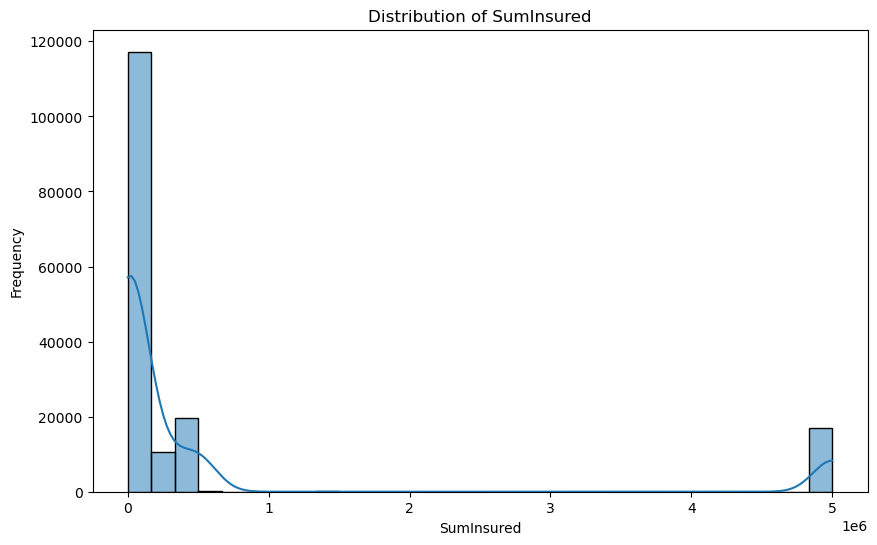

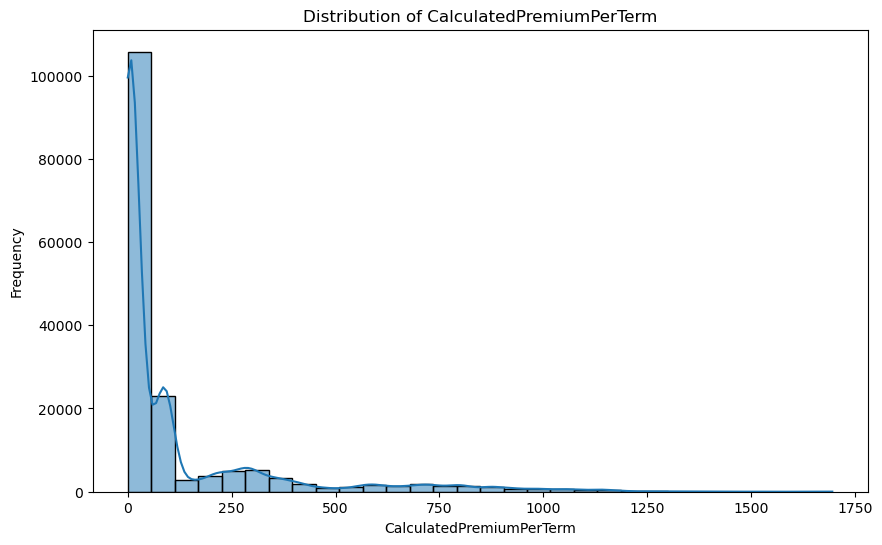

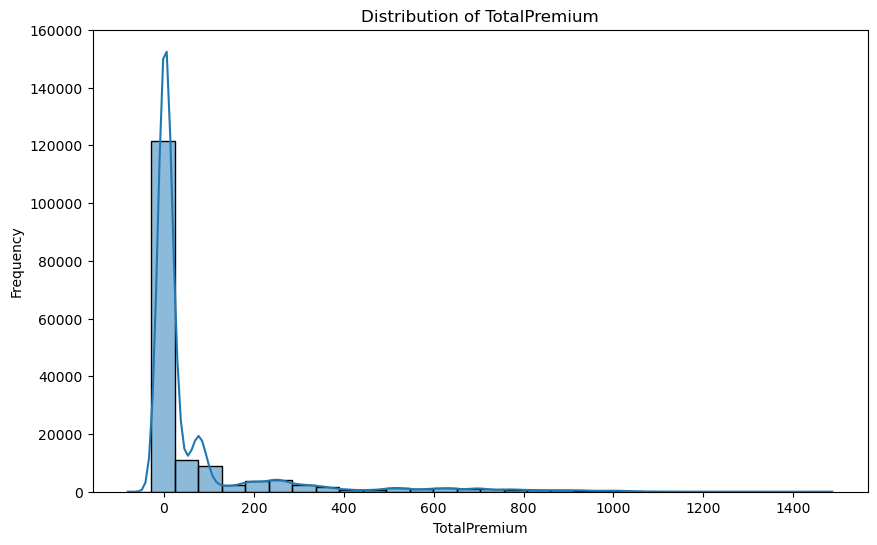

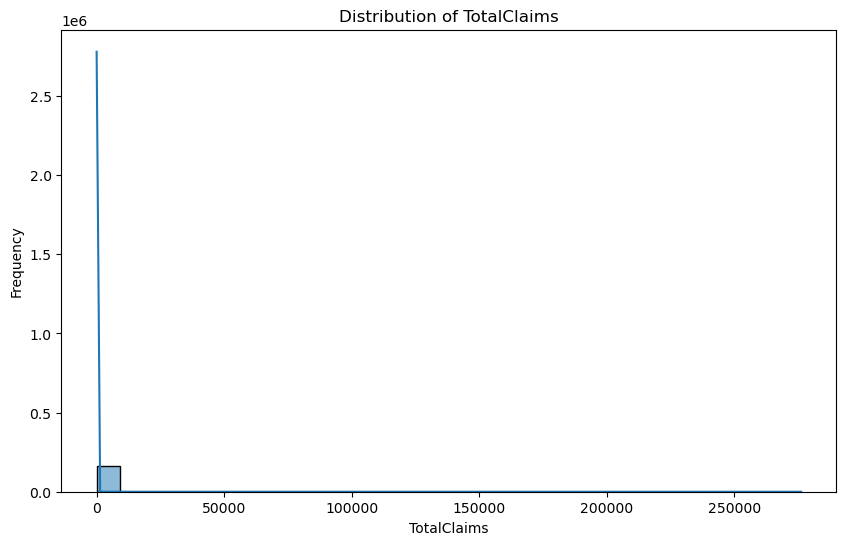

In [11]:
analyzer.plot_univariate_distribution(columns=['SumInsured', 'CalculatedPremiumPerTerm',  'TotalPremium','TotalClaims'])

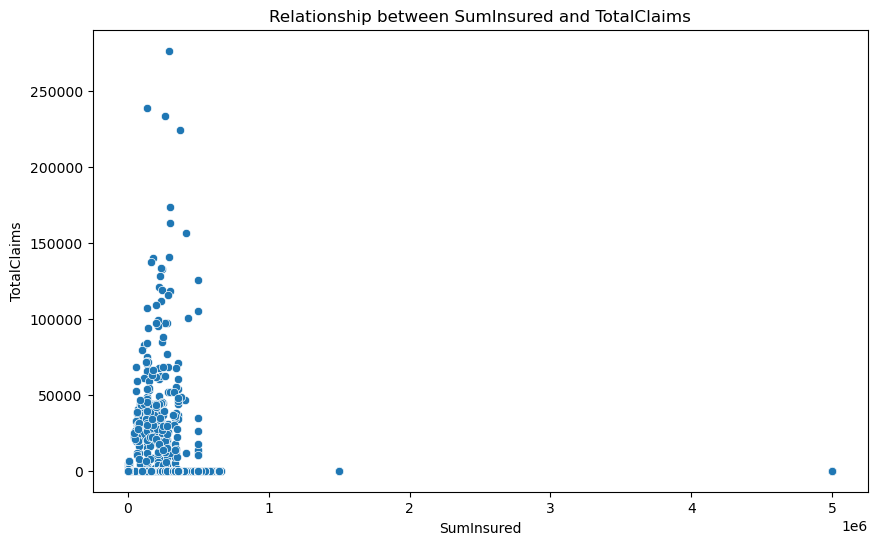

In [12]:
# Bivariate analysis
analyzer.plot_bivariate_relationship(x='SumInsured', y='TotalClaims')


Trends Over Geography:


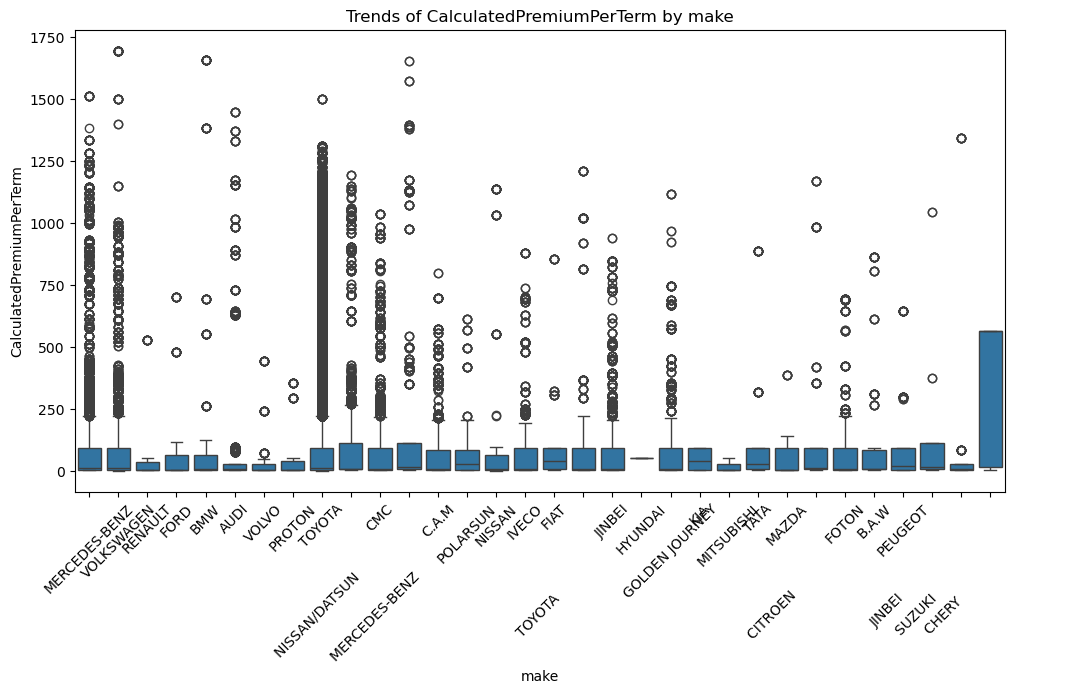

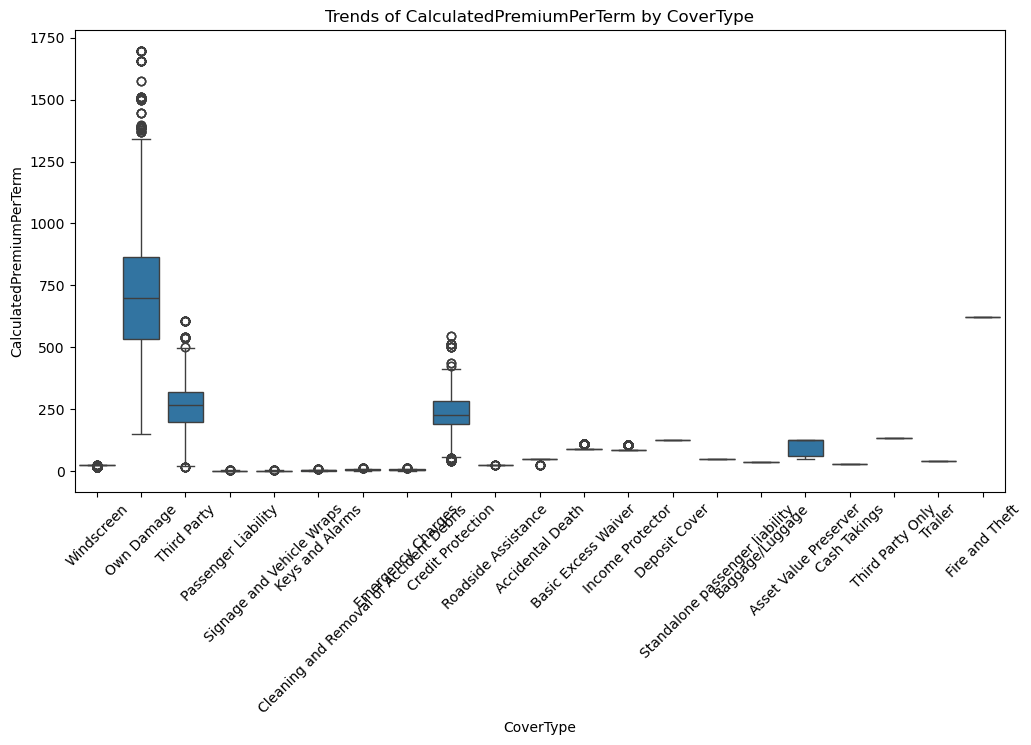

In [10]:
# Plot trends over geography
print("\nTrends Over Geography:")
analyzer.plot_trends_over_geography('CalculatedPremiumPerTerm', ['make', 'CoverType'])


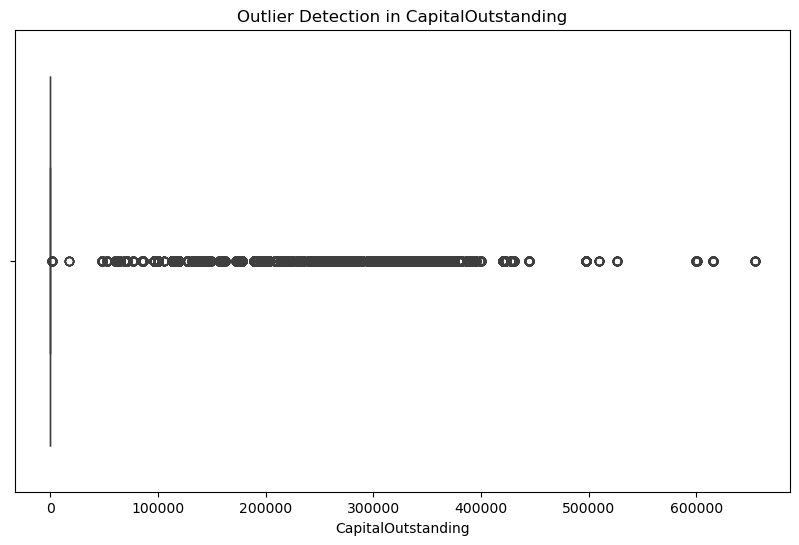

In [28]:
# Detect outliers
data_check.detect_outliers_plot(column='CapitalOutstanding')

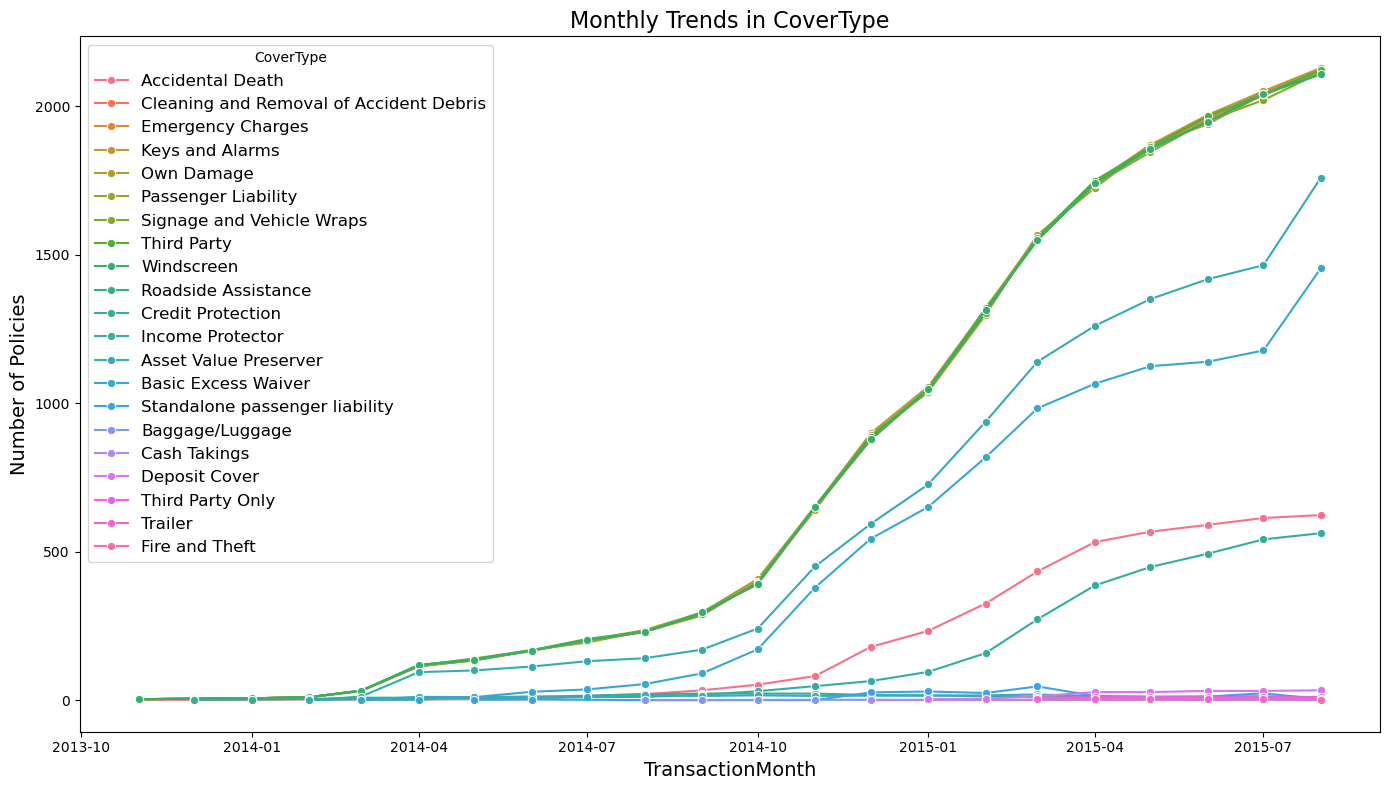

In [25]:
# monthly trends
analyzer.plot_monthly_trends(month_col='TransactionMonth', category_col='CoverType')